This notebook is part of the *orix* documentation https://orix.rtfd.io. Links to the documentation won’t work from the notebook.

# Stereographic projection 2

The stereographic projection maps a sphere onto a plane, and preserves angles at
which curves meet. In orix, the projection is used to project unit
[Vector3d](reference.rst#orix.vector.Vector3d) objects onto the equatorial plane
represented in spherical coordinates, notably the azimuth angle $\phi$, in the
range $[0^{\circ}, 360^{\circ}]$, and the polar angle $\theta$, in the range
$[0^{\circ}, 90^{\circ}]$ on the upper hemisphere and
$[90^{\circ}, 180^{\circ}]$ on the lower hemisphere. The projection is
implemented in
[StereographicProjection](reference.rst#orix.projections.StereographicProjection),
together with the
[InverseStereographicProjection](reference.rst#orix.projections.InverseStereographicProjection).
These are used in the
[StereographicPlot](reference.rst#orix.plot.StereographicPlot), which extends
Matplotlib's projections framework for plotting of `Vector3d` objects.

The projection can be used "from Matplotlib", in that `Vector3d` objects or the
spherical coordinates ($\phi$, $\theta$) are passed to Matplotlib functions.
While this is the most customizable way of plotting vectors in the stereographic
projection, a [Vector3d.scatter()](reference.rst#orix.vector.Vector3d.scatter)
method is also provided for quick and easy plotting.

This user guide shows how to plot vectors in the stereographic projection, and
how to customize the stereographic plots, using both the quick
`Vector3d.scatter()` method and the "from Matplotlib" way.

In [1]:
# Exchange "inline" for:
# "qt5" for interactive plotting from the pyqt package
# "notebook" for inline interactive plotting when running on Binder
%matplotlib inline

import tempfile
import numpy as np
import matplotlib.pyplot as plt
from orix import vector


# We'll want our plots to look a bit larger than the default size
new_params = {
    "figure.figsize": (10, 10),
    "lines.markersize": 10,
    "font.size": 20,
    "axes.grid": False,
}
plt.rcParams.update(new_params)

## Plot vectors

Plotting three vectors with
[Vector3d.scatter()](reference.rst#orix.vector.Vector3d.scatter) without
customizing the plot

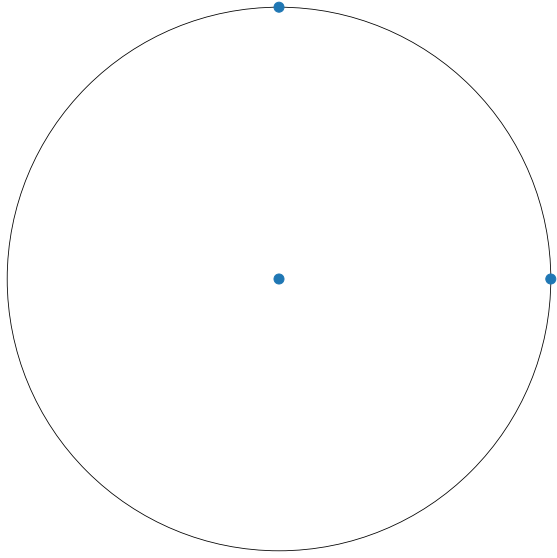

In [2]:
v1 = vector.Vector3d([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
v1.scatter()

Hover the cursor over the equatorial plane to see the spherical coordinates when
plotting interactively (with `qt5`, `notebook`, or similar backends).

The current figure is available in the
[Vector3d.figure](reference.rst#orix.vector.Vector3d.figure) attribute

In [3]:
temp_dir = tempfile.mkdtemp() + "/"  # Write to a temporary directory
vector_file = temp_dir + "vectors.png"
v1.figure.savefig(vector_file, bbox_inches="tight", pad_inches=0)

In the "from Matplotlib" way with
[StereographicPlot.scatter()](reference.rst#orix.plot.StereographicPlot.scatter)

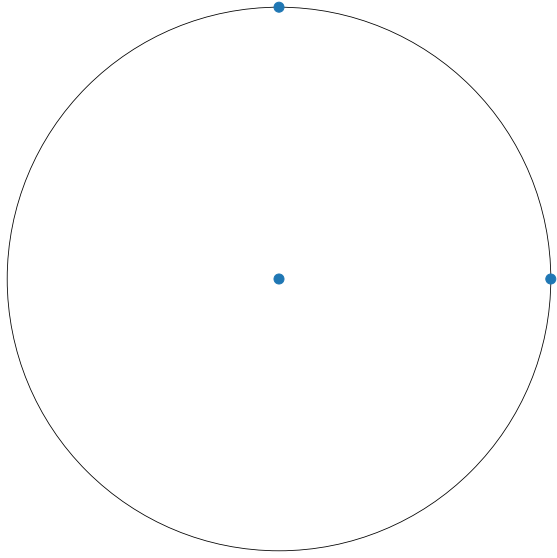

In [4]:
fig, ax = plt.subplots(subplot_kw=dict(projection="stereographic"))
ax.scatter(v1)

Let's turn on the azimuth and polar grid by updating the Matplotlib preferences.

In [5]:
plt.rcParams["axes.grid"] = True

### Upper and/or lower hemisphere

We can plot vectors impinging on the upper hemisphere and/or the lower hemisphere
by passing "upper", "lower", or "both" to the `hemisphere` parameter in
[Vector3d.scatter()](reference.rst#orix.vector.Vector3d.scatter)

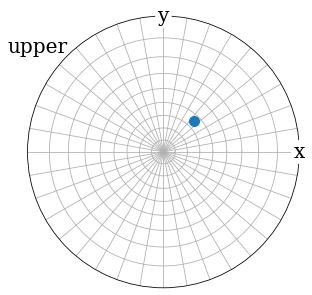

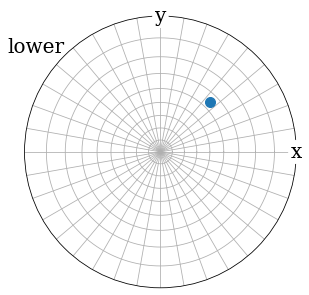

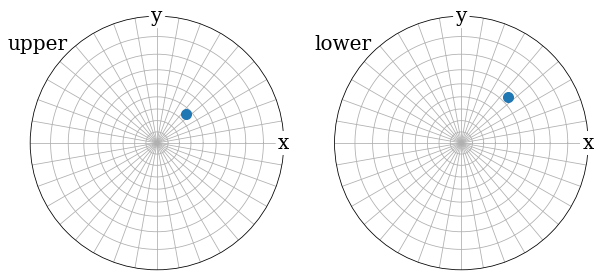

In [6]:
v2 = vector.Vector3d([[1, 1, 2], [1, 1, -1]])

fig_kwargs = dict(figsize=(5, 5))
labels = ["x", "y", None]
v2.scatter(
    axes_labels=labels, show_hemisphere_label=True, figure_kwargs=fig_kwargs
)  # "upper" default
v2.scatter(
    hemisphere="lower",
    axes_labels=labels,
    show_hemisphere_label=True,
    figure_kwargs=fig_kwargs
)
v2.scatter(hemisphere="both", axes_labels=labels)

In the "from Matplotlib" way by setting the
[StereographicPlot.hemisphere](reference.rst#orix.plot.StereographicPlot.hemisphere)
attribute. Remember to set the hemisphere before calling `scatter()`.

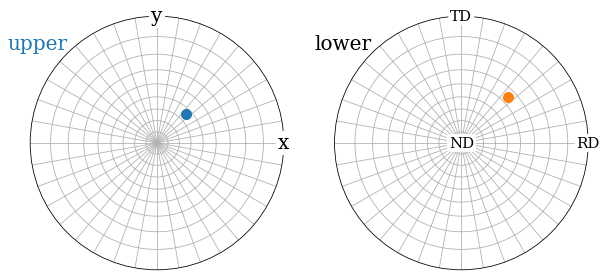

In [7]:
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

ax[0].scatter(v2, c="C0")  # blue
ax[0].show_hemisphere_label(color="C0")  # Pass keyword arguments to text()
ax[0].set_labels(zlabel=None)

ax[1].hemisphere = "lower"  # /"south", or "upper"/"north"
ax[1].scatter(v2, c="C1")  # orange
ax[1].show_hemisphere_label()
ax[1].set_labels("RD", "TD", "ND", size=15)  # Pass keyword arguments to text()

### Control grid

Whether to show the grid or not can be set globally via
[Matplotlib rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlib-rcparams)
or controlled via the parameters `grid`, True/False, and `grid_resolution`, a tuple with
(azimuth, polar) resolution in degrees, to
[Vector3d.scatter()](reference.rst#orix.vector.Vector3d.scatter). Default grid
resolution is $0^{\circ}$ for both grids.

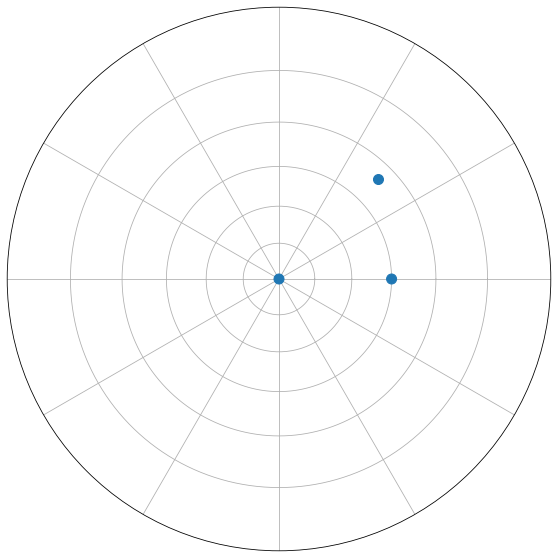

In [8]:
v3 = vector.Vector3d([[0, 0, 1], [1, 0, 1], [1, 1, 1]])
v3.scatter(grid_resolution=(30, 15))

These can also be set after the figure is created via the
[Vector3d.figure](reference.rst#orix.vector.Vector3d.figure) attribute

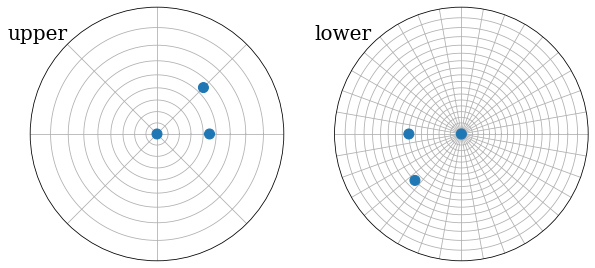

In [9]:
v4 = vector.Vector3d(np.append(v3.data, -v3.data, axis=0))

v4.scatter(hemisphere="both")
ax0, ax1 = v4.figure.axes
ax0.azimuth_grid(45)
ax1.polar_grid(5)

We can also remove the grid if desirable

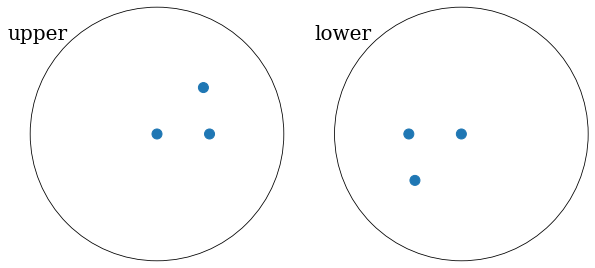

In [10]:
v4.scatter(hemisphere="both", grid=False)

In the "from Matplotlib" way, the polar and azimuth grid resolution can be set either upon axis initialization
or after the axis is created using
[StereographicPlot.polar_grid()](reference.rst#orix.plot.StereographicPlot.polar_grid)
and
[StereographicPlot.azimuth_grid()](reference.rst#orix.plot.StereographicPlot.azimuth_grid).
The default grid resolution is $10^{\circ}$ for both grids, but these can be
changed separately

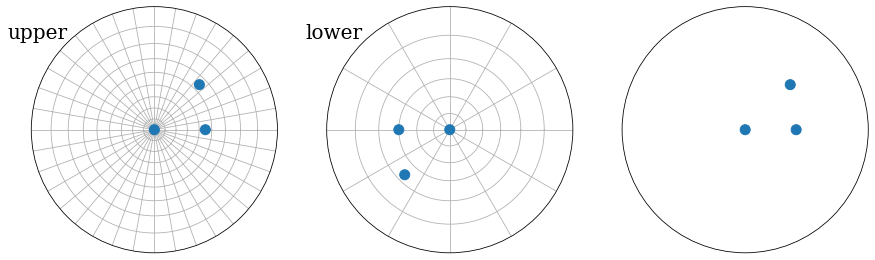

In [11]:
subplot_kw = dict(
    projection="stereographic", polar_resolution=10, azimuth_resolution=10
)
fig, ax = plt.subplots(ncols=3, figsize=(15, 20), subplot_kw=subplot_kw)

ax[0].scatter(v4)
ax[0].show_hemisphere_label()

ax[1].hemisphere = "lower"
ax[1].show_hemisphere_label()
ax[1].scatter(v4)
ax[1].polar_grid(15)
ax[1].azimuth_grid(30)

ax[2].scatter(v4)
ax[2].grid(False)

### Annotate vectors

Vectors can be annotated by passing a list of strings to the `vector_labels` 
parameter in [Vector3d.scatter()](reference.rst#orix.vector.Vector3d.scatter)

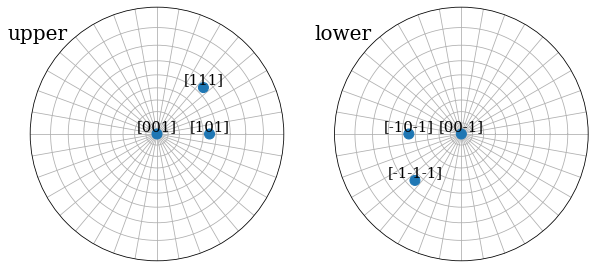

In [12]:
v4.scatter(
    hemisphere="both",
    vector_labels=[str(vi).replace(" ", "") for vi in v4.data],
    text_kwargs=dict(size=15)
)

In the "from Matplotlib" way, by looping over the vectors and adding text
markers using [StereographicPlot.text()](reference.rst#orix.plot.StereographicPlot.text)

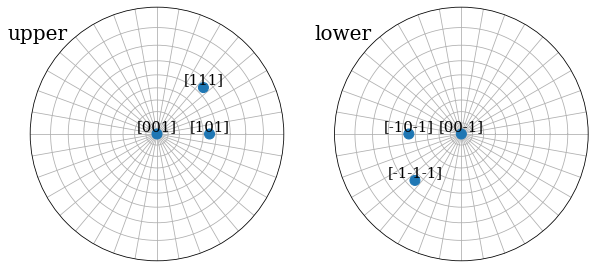

In [13]:
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

format_vector = lambda v: str(v.data[0]).replace(" ", "")

ax[0].scatter(v4)
ax[0].show_hemisphere_label()
for vi in v4:
    ax[0].text(vi, s=format_vector(vi), size=15)
    
ax[1].hemisphere = "lower"
ax[1].scatter(v4)
ax[1].show_hemisphere_label()
for vi in v4[:2]:
    ax[1].text(vi, s=format_vector(vi), size=15)
for vi in v4[2:]:
    ax[1].text(vi, s=format_vector(vi), size=15)

### Pass spherical coordinates

We can also pass azimuth and polar angles instead of passing vectors. This only
works in the "from Matplotlib" way

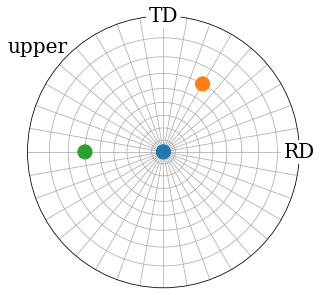

In [14]:
fig, ax = plt.subplots(
    figsize=(5, 5), subplot_kw=dict(projection="stereographic")
)
azimuth = np.deg2rad([0, 60, 180])
polar = np.deg2rad([0, 60, 60])
ax.scatter(azimuth, polar, c=["C0", "C1", "C2"], s=200)
ax.set_labels("RD", "TD", None)
ax.show_hemisphere_label()

Here, we also passed `None` to
[StereographicPlot.set_labels()](reference.rst#orix.plot.StereographicPlot.set_labels)
so that the Z axis label is not shown.

Producing the same plot with `Vector3d.scatter()`

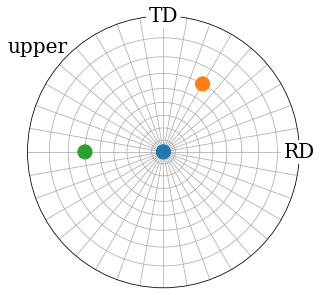

In [15]:
v5 = vector.Vector3d.from_polar(azimuth=azimuth, polar=polar)
v5.scatter(
    axes_labels=["RD", "TD", None],
    show_hemisphere_label=True,
    figure_kwargs=dict(figsize=(5, 5)),
    c=["C0", "C1", "C2"],
    s=200
)

### Draw great and small circles

We can draw the trace of a plane perpendicular to a vector using
[Vector3d.draw_circle()](reference.rst#orix.vector.Vector3d.draw_circle)

The "from Matplotlib" way

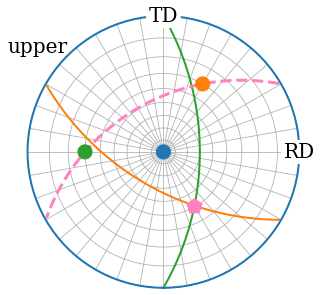

In [46]:
fig, ax = plt.subplots(
    figsize=(5, 5), subplot_kw=dict(projection="stereographic")
)
colors = ["C0", "C1", "C2"]
azimuth = np.deg2rad([0, 60, 180])
polar = np.deg2rad([0, 60, 60])
ax.scatter(azimuth, polar, c=colors, s=200)
ax.set_labels("RD", "TD", None)
ax.show_hemisphere_label()
ax.draw_circle(azimuth, polar, color=colors, linewidth=2)

# Let's also add the vector perpendicular to the vectors 
v6 = vector.Vector3d.from_polar(azimuth=azimuth[1:], polar=polar[1:])
v7 = v6[0].cross(v6[1])
ax.scatter(v7, c="xkcd:pink", marker="p", s=250)
ax.draw_circle(v7, color="xkcd:pink", linestyle="--", linewidth=3)

## Experimental functionality

Plot symmetry elements of point groups with proper rotations only, using
[StereographicPlot.symmetry_marker()](reference.rst#orix.plot.StereographicPlot.symmetry_marker)

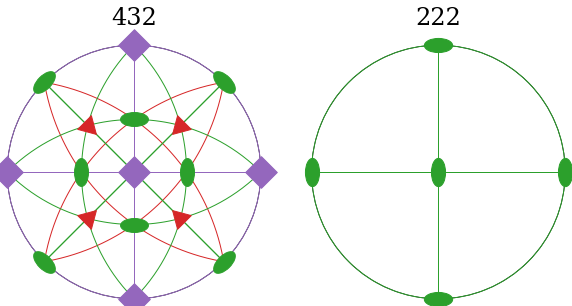

In [19]:
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

marker_size = 500
ax[0].grid(False)
ax[0].set_title("432", pad=20)
# 4-fold (outer markers will be clipped a bit...)
v4fold = vector.Vector3d(
    [[0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]]
)
ax[0].symmetry_marker(v4fold, fold=4, c="C4", s=marker_size)
ax[0].draw_circle(v4fold, color="C4")
# 3-fold
v3fold = vector.Vector3d([[1, 1, 1], [1, -1, 1], [-1, -1, 1], [-1, 1, 1]])
ax[0].symmetry_marker(v3fold, fold=3, c="C3", s=marker_size)
ax[0].draw_circle(v3fold, color="C3")
# 2-fold
v2fold = vector.Vector3d([
    [1, 0, 1],
    [0, 1, 1],
    [-1, 0, 1],
    [0, -1, 1],
    [1, 1, 0],
    [-1, -1, 0],
    [-1, 1, 0],
    [1, -1, 0],
])
ax[0].symmetry_marker(v2fold, fold=2, c="C2", s=marker_size)
ax[0].draw_circle(v2fold, color="C2")

ax[1].grid(False)
ax[1].set_title("222", pad=20)
# 2-fold
v2fold = vector.Vector3d([
    [0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]
])
ax[1].symmetry_marker(v2fold, fold=2, c="C2", s=800)
ax[1].draw_circle(v2fold, color="C2")

In [20]:
# Remove files written to disk in this user guide
import os
os.remove(vector_file)
os.rmdir(temp_dir)